_ok, take a step back and think what result are we looking for_

_we have id (image id corresponding to the word), len (word length), greek, scramble, pseudo_

_we have 2 tables in 100x3 dimension, which is accuracy (ratio) and reaction time (s)_

_if we want to measure timeracy, we could do a simple mean of all the pair (mean(greek), mean(scramble), mean(pseudo))_


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

accudf = pd.read_csv("Accuracy.csv")
timedf = pd.read_csv("reactiontime.csv")

In [4]:
# create wordlist (word pair type, consists of greek, scramble, and pseudo by default), wordlenlist (word length, consist of 3-7 by default)
wordlist = list(accudf)[2:]
wordlenlist = np.unique((accudf["len"]))

## Mean of accuracy per word pair and word length
mean of accuracy per word pair (in greek, scrumble, and pseudo = 3) and by word length (3-7 letter word = 5)

look up [`subplots`](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) document page if you forgot lol

greek accuracy = 41.0 %
scramble accuracy = 37.0 %
pseudo accuracy = 50.0 %
3 letter word accuracy = 46.6667 %
4 letter word accuracy = 41.6667 %
5 letter word accuracy = 46.6667 %
6 letter word accuracy = 31.6667 %
7 letter word accuracy = 46.6667 %


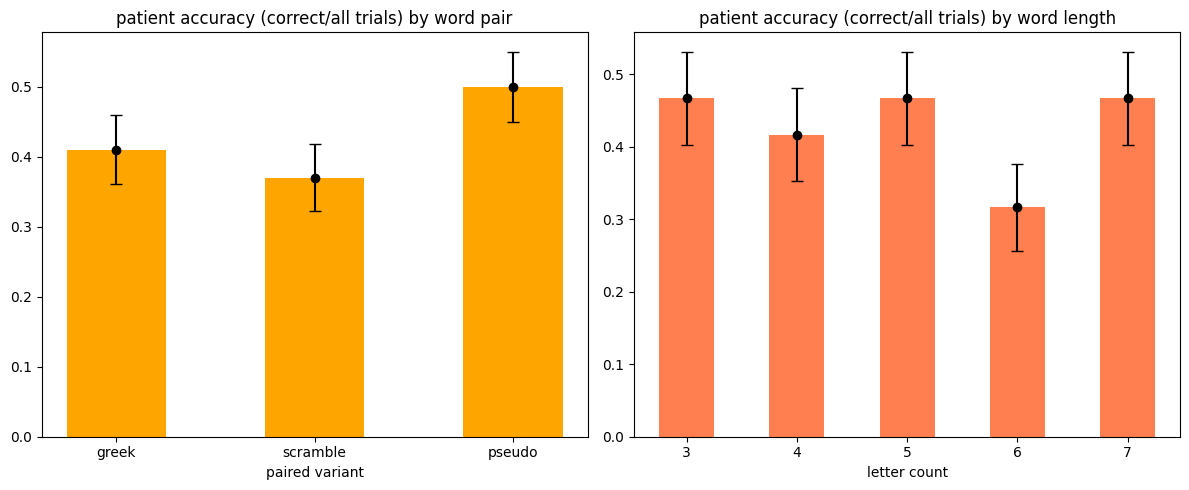

In [5]:
# accuracy part

accupair_y = [np.mean(accudf[pair]) for pair in wordlist]
accupair_err = [np.std(accudf[pair], ddof = 0)/np.sqrt(accudf[pair].size) for pair in wordlist]
acculen_y, acculen_err = [], []

# assign mean of accuracy by word and by word length, altogether with SE = SD/sqrt(count)
for pair in wordlist:
    print(pair,"accuracy =",round(np.mean(accudf[pair])*100,4), "%")

for len in wordlenlist:
    wordlen_accudf = accudf.loc[accudf["len"] == len,wordlist]

    acculen_y.append(np.mean(wordlen_accudf))
    acculen_err.append(np.std(wordlen_accudf.to_numpy(), ddof = 0)/np.sqrt(wordlen_accudf.size))
    
    print(len,"letter word accuracy =",round(np.mean(wordlen_accudf)*100,4), "%")



# plot both the mean of accuracy by word pair and by word length

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))

ax1.bar(wordlist, accupair_y, color = "orange", width=0.5)
ax1.errorbar(wordlist, accupair_y, yerr = accupair_err, fmt = 'o', color = "black" ,capsize=4)
ax1.set_title("patient accuracy (correct/all trials) by word pair")
ax1.set_xlabel("paired variant")

ax2.bar(wordlenlist, acculen_y, color = "coral", width = 0.5)
ax2.errorbar(wordlenlist, acculen_y, yerr = acculen_err, fmt = 'o', color = "black", capsize = 4)
ax2.set_title("patient accuracy (correct/all trials) by word length")
ax2.set_xlabel("letter count")

plt.tight_layout()
plt.show()

## Mean of reaction time per word pair and word length
mean of reaction time per word pair (in greek, scrumble, and pseudo = 3) and by word length (3-7 letter word = 5)


...what? it's self-explanatory

greek reaction time = 6398.4 %
scramble reaction time = 6543.5 %
pseudo reaction time = 6709.8 %
3 letter word reaction time = 6735.1667 %
4 letter word reaction time = 6477.0 %
5 letter word reaction time = 6466.1667 %
6 letter word reaction time = 6414.0 %
7 letter word reaction time = 6660.5 %


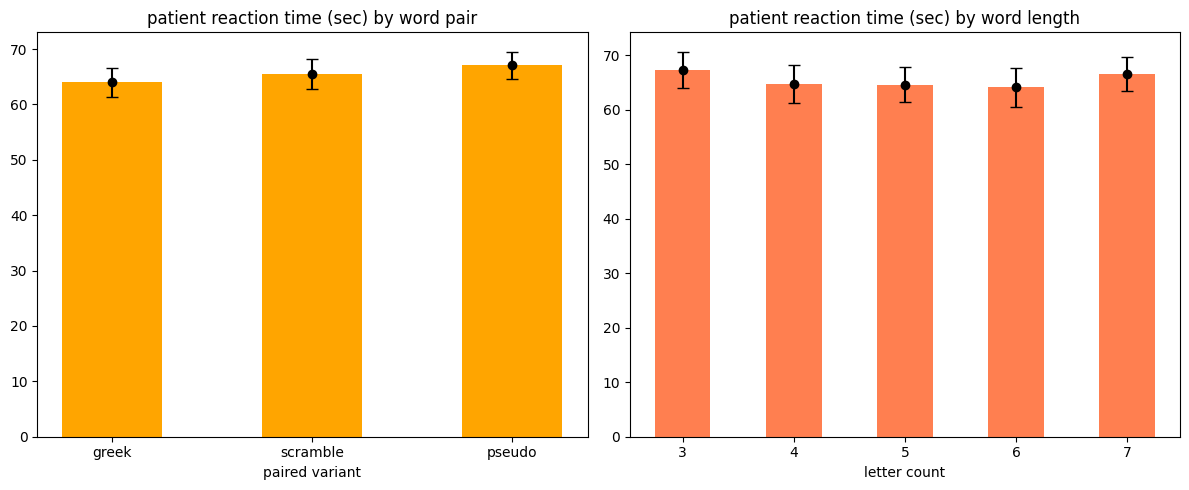

In [6]:
# reaction time part

timepair_y, timepair_err = [], []
timelen_y, timelen_err = [], []

# assign mean of reaction time by word and by word length, altogether with SE = SD/sqrt(count)
for pair in wordlist:
    print(pair,"reaction time =",round(np.mean(timedf[pair])*100,4), "%")

    timepair_y.append(np.mean(timedf[pair]))
    timepair_err.append(np.std(timedf[pair], ddof = 0)/np.sqrt(timedf[pair].size))


for len in wordlenlist:
    wordlen_timedf = timedf.loc[timedf["len"] == len,wordlist]

    print(len,"letter word reaction time =",round(np.mean(wordlen_timedf)*100,4), "%")

    timelen_y.append(np.mean(wordlen_timedf))
    timelen_err.append(np.std(wordlen_timedf.to_numpy(), ddof = 0)/np.sqrt(wordlen_timedf.size))


# plot both the mean of reaction time by word pair and by word length

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))

ax1.bar(wordlist, timepair_y, color = "orange", width=0.5)
ax1.errorbar(wordlist, timepair_y, yerr = timepair_err, fmt = 'o', color = "black" ,capsize=4)
ax1.set_title("patient reaction time (sec) by word pair")
ax1.set_xlabel("paired variant")

ax2.bar(wordlenlist, timelen_y, color = "coral", width = 0.5)
ax2.errorbar(wordlenlist, timelen_y, yerr = timelen_err, fmt = 'o', color = "black", capsize = 4)
ax2.set_title("patient reaction time (sec) by word length")
ax2.set_xlabel("letter count")

plt.tight_layout()
plt.show()

## ANOVA for mean difference between group
Use one-way ANOVA to check whether if there is an accuracy difference between group

<span style="color:red">should we use the proportion (16/20 correct = 0.8 --> mean) or the actual successful trial (16 correct? --> mean)</span>.


In [7]:
# calculate difference inbetween group, using aonva first
anova_accu_bypair =  stats.f_oneway(accudf["greek"], accudf["scramble"], accudf["pseudo"])
print(anova_accu_bypair)

# for calculating by word length, the located dataframe with (len == x) condition is 20x3 dimension
# we have to flatten all those 60 values into a single list using ravel(), and maybe add .tolist() to change into list type
templist = [accudf.loc[accudf["len"] == len].to_numpy().ravel().tolist() for len in wordlenlist]

# then we unpack it from [A, B, C] --> A, B, C by *[]
stats.f_oneway(*templist)

F_onewayResult(statistic=1.8161379310344827, pvalue=0.1644543794005211)


F_onewayResult(statistic=8.401072936958204, pvalue=1.4572770020272713e-06)